Convolutional Neural Network on CIFAR-10

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Softmax, Flatten, Dropout, Conv2D, MaxPool2D
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

Load dataset from Tensorflow

In [2]:
cifar = tf.keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
class_names = ['airplane', 'auto', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Check Shape of Data

In [4]:
train_images.shape

(50000, 32, 32, 3)

View image of dataset

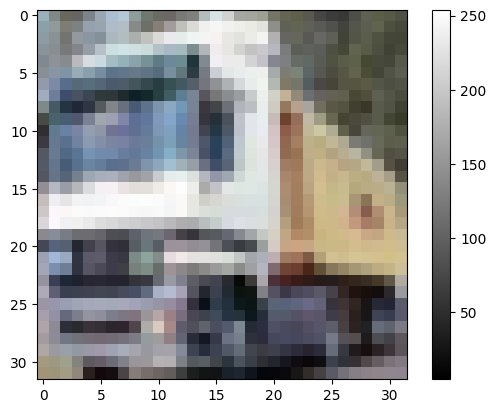

In [5]:
plt.figure()
plt.imshow(train_images[1], cmap= 'gray')
plt.colorbar()
plt.grid(False)
plt.show()

Resize dataset

In [6]:
train_images = train_images / 255.0

test_images = test_images / 255.0

View 25 images with label

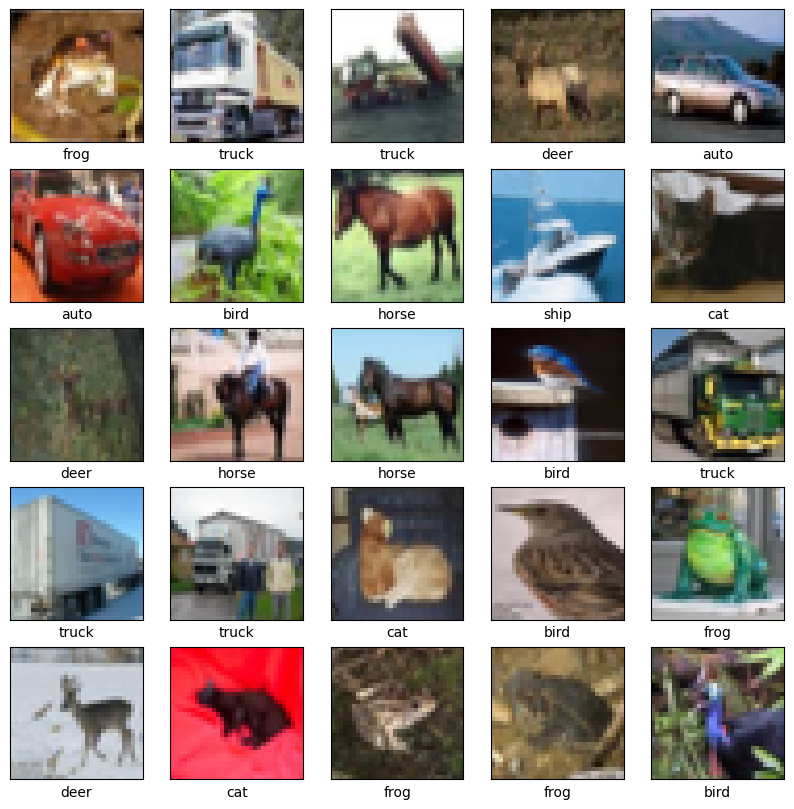

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels.item(i)])

plt.show()

Create Model

In [8]:

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(32,32,3)),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')
])


Compile Model

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Summary model

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)          0

Train the model

In [11]:
model.fit(train_images, train_labels, epochs=50)

Epoch 1/50


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 19s 5ms/step - loss: 1.6074 - accuracy: 0.4106
Epoch 2/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2896 - accuracy: 0.5389
Epoch 3/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1750 - accuracy: 0.5820
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0972 - accuracy: 0.6112
Epoch 5/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0450 - accuracy: 0.6321
Epoch 6/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0068 - accuracy: 0.6458
Epoch 7/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9813 - accuracy: 0.6550
Epoch 8/50
1563/1563 [==============================] - 10s 7ms/step - loss: 0.9567 - accuracy: 0.6648
Epoch 9/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9350 - accuracy: 0.6728
Epoch 10/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9163 - accu

Verify Accuracy

In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.6907 - accuracy: 0.7701 - 820ms/epoch - 3ms/step

Test accuracy: 0.7700999975204468


Predict model

In [13]:
y_pred = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


Classification Report

In [14]:
y_pred = [np.argmax(arr) for arr in y_pred]
print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79      1000
           1       0.93      0.84      0.89      1000
           2       0.69      0.64      0.66      1000
           3       0.62      0.55      0.58      1000
           4       0.69      0.79      0.74      1000
           5       0.72      0.64      0.67      1000
           6       0.73      0.89      0.80      1000
           7       0.88      0.77      0.82      1000
           8       0.83      0.90      0.86      1000
           9       0.85      0.87      0.86      1000

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



Confusion Matrix

In [15]:
cm = confusion_matrix(test_labels,y_pred)
cm

array([[823,   5,  32,   9,  18,   3,   8,  10,  70,  22],
       [ 22, 842,   3,   6,   4,   3,  15,   3,  27,  75],
       [ 75,   1, 636,  47,  86,  47,  72,  17,  11,   8],
       [ 26,   3,  61, 546,  82, 119, 117,  15,  19,  12],
       [ 19,   1,  58,  27, 788,  15,  53,  27,  12,   0],
       [ 16,   1,  48, 158,  52, 636,  42,  26,  12,   9],
       [  8,   0,  32,  29,  24,   8, 893,   3,   3,   0],
       [ 16,   1,  30,  34,  77,  51,   9, 767,   5,  10],
       [ 47,  12,   8,   8,   5,   1,   7,   1, 896,  15],
       [ 19,  36,   8,  11,   6,   3,  10,   5,  28, 874]])

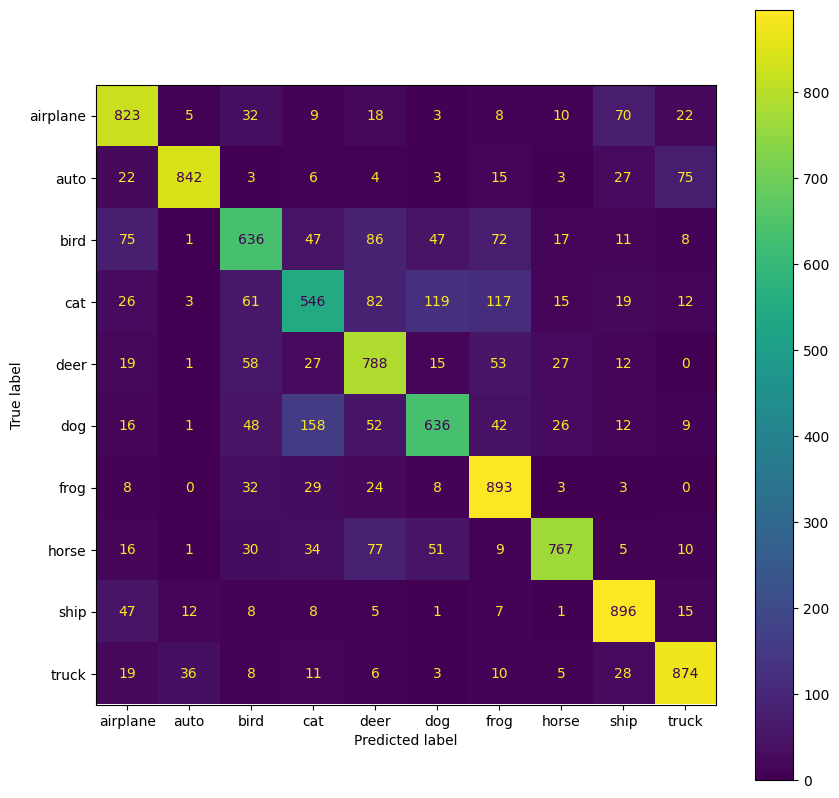

In [16]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax);